In [1]:
import tensorflow as tf

### Testing

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [3]:
x_train = x_train/255.0
x_val = x_val/255.0

In [22]:
encoder_input = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(encoder_input)
encoder_output = tf.keras.layers.Dense(256, activation='relu')(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_output)
x = tf.keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,992 (1.28 MB)

 Trainable params: 334,992 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0098
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0092


In [24]:
test = autoencoder.predict(x_val[0].reshape(-1,28,28,1))[0]
test.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.1895545  1.0543425  0.37757194 1.0539631  0.8627418  0.8620721
  0.6858041  0.42335752 0.9484832  1.8738371  1.3039634  0.9728574
  0.57437897 0.6788248  0.62139046 0.23952508]
 [0.62847203 0.73789144 1.485988   0.9847955  1.682204   1.2071139
  1.0732362  0.76858    0.8328409  1.9183947  0.7395315  1.0932549
  0.2526654  0.43445897 0.66812736 0.8001471 ]
 [1.3007375  1.1897982  0.6567374  0.6260133  0.67630434 0.43824753
  1.0536023  0.5620128  1.6403995  1.5772513  0.98589784 1.0816039
  0.92581964 1.2669325  0.64806    1.1183285 ]
 [0.79394466 0.73137957 0.5503149  1.9749103  0.46771613 1.526174
  0.         0.3214605  2.1637409  1.4301504  0.8989296  0.38788125
  1.2992724  1.2070817  0.71106887 1.1616987 ]
 [1.9316238  0.85898054 0.51931554 0.3661218  0.81729764 0.66990536
  0.84554416 0.43269524 0.65930575 0.8465069  0.8456151  0.8863379
  0.73286456 0.37203297 0.35932052 0.32965052]
 [0.96879613 0.37529865 0.79998577 1.1869241  0.5910128

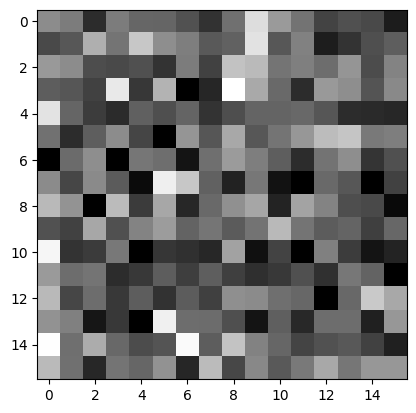

In [25]:
import matplotlib.pyplot as plt

encode = encoder.predict(x_val[0].reshape(-1,28,28,1))[0]

print(encode.reshape((16,16)))
plt.imshow(encode.reshape((16,16)), cmap='gray')

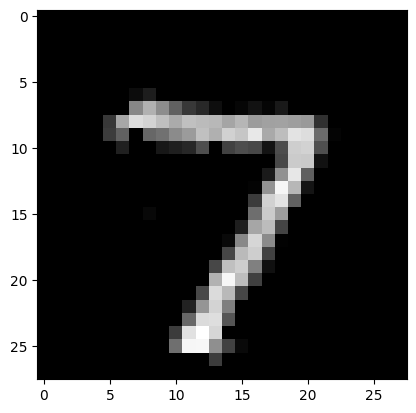

In [26]:
plt.imshow(test, cmap='gray');

In [ ]:
BATCH_SIZE = 64
IMG_SIZE = (120, 120)
DIRECTORY_PATH = r"C:\Users\LENOVO\Desktop\New folder (3)"
NUM_CLASSES = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    DIRECTORY_PATH,
    validation_split=0.2,
    subset='training',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode=None
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DIRECTORY_PATH,
    validation_split=0.2,
    subset='validation',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode=None
)


Found 1060 files.
Using 848 files for training.
Found 1060 files.
Using 212 files for validation.


In [31]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [64]:
FILL_MODE = 'nearest'
VALUE_RANGE = [0.0, 1.0]

augment1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1,fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

augment2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomBrightness((-0.5, 0.5), value_range=VALUE_RANGE),
    tf.keras.layers.RandomTranslation((-0.2, 0.3), (-0.3, 0.2), fill_mode=FILL_MODE),
    tf.keras.layers.RandomContrast(0.1),
])

augment3 = tf.keras.Sequential([
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomBrightness((-0.35, 0.35), value_range=VALUE_RANGE),
    tf.keras.layers.RandomRotation(0.3,fill_mode=FILL_MODE),
    tf.keras.layers.Resizing(120, 120)
])

augment4 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

augment5 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness((-0.2, 0.5), value_range=VALUE_RANGE),
])

def preprocess(pipeline = None):
    def augment(img):
        img = tf.cast(img, tf.float32) / 255.0
        if pipeline is not None:
           img =  pipeline(img)
        return img, img
    return augment

In [65]:
augment3.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_height_4 (RandomHeight)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_13            │ ?                      │   0 (unbuilt) │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_9               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
aug1 = train_ds.map(preprocess(augment1), num_parallel_calls=tf.data.AUTOTUNE)
aug2 = train_ds.map(preprocess(augment2), num_parallel_calls=tf.data.AUTOTUNE)
aug3 = train_ds.map(preprocess(augment3), num_parallel_calls=tf.data.AUTOTUNE)
aug4 = train_ds.map(preprocess(augment4), num_parallel_calls=tf.data.AUTOTUNE)
aug5 = train_ds.map(preprocess(augment5), num_parallel_calls=tf.data.AUTOTUNE)
original = train_ds.map(preprocess(), num_parallel_calls=tf.data.AUTOTUNE)

trainData = tf.data.Dataset.sample_from_datasets(
    [aug1, aug2, aug3, aug4, aug5, original],
    weights=[0.5] * 6
)
valData = val_ds.map(preprocess())

In [74]:
valData

<_MapDataset element_spec=(TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None))>

In [80]:
input_img = tf.keras.layers.Input(shape=(120, 120, 1))

x = tf.keras.layers.Conv2D(32, (11, 11), strides=1, activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (7, 7), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = tf.keras.Model(input_img, encoded, name='encoder')

# ---------------- Decoder ----------------
x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 120, 120, 32)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 60, 60, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 30, 30, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 60, 60, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 120, 120, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 120, 120, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,097 (1.60 MB)

 Trainable params: 419,201 (1.60 MB)

 Non-trainable params: 896 (3.50 KB)

In [81]:
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return mse + (1 - ssim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=combined_loss)

autoencoder.fit(
    trainData.repeat(),
    epochs=10,
    steps_per_epoch=50
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 0.3783 - mean_squared_error: 0.0212
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - loss: 0.2373 - mean_squared_error: 0.0109
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 0.2074 - mean_squared_error: 0.0067
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - loss: 0.1837 - mean_squared_error: 0.0097
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 0.1713 - mean_squared_error: 0.0049
Epoch 6/10
28/50 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.1598 - mean_squared_error: 0.0038

<class 'tensorflow.python.data.ops.map_op._MapDataset'>
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


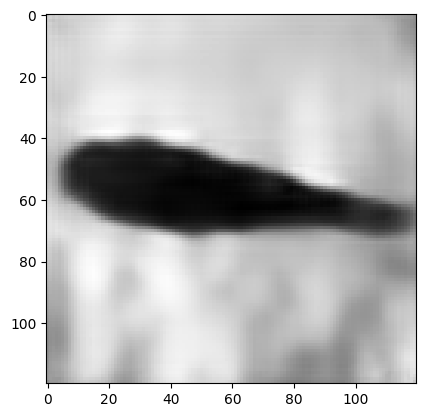

In [79]:
predict = valData.map(lambda x, y: x)
print(type(predict))
prediction = autoencoder.predict(predict)
plt.imshow(prediction[0], cmap='gray');